# Chapter 10 케라스를 사용한 인공 신경망 소개
인공 신경망: 뇌에 있는 생물학적 뉴런의 네트워크에서 영감을 받은 머신러닝 모델

## 10.1 생물학적 뉴런에서 인공 뉴런까지
- 인공 신경망이 우리 생활에 훨씬 커다란 영향을 줄 것이라는 근거:
    - 신경망을 훈련하기 위한 데이터가 엄청나게 많아짐.
    - 1990년대 이후 컴퓨터 하드웨어가 크게 발전했고, 납득할 만한 시간 안에 대규모 신경망을 훈련할 수 있음.
    - 훈련 알고리즘이 향상됨
    - 일부 인공 신경망의 이론상 제한이 실전에서는 문제가 되짐 않음
    - 인공 신경망이 투자와 진보의 선순환에 들어간 것으로 보임.

### 10.1.1 생물학적 뉴런


![nn](https://github.com/oony97/Hands-On-Machine-Learning/blob/main/%EA%B7%B8%EB%A6%BC10_1.PNG)

- 수상돌기 <-> 축삭돌기 <-> 축삭끝가지 <-> 시냅스 말단 (시냅스) <br>
- 활동 전위 또는 신호라고 부른 짧은 전기 자극은 축삭 돌기를 따라 이동하여 신경전달물질이라는 화학적 신호를 발생.

### 10.1.2 뉴런을 사용한 논리 연산
인공 뉴런: 하나 이상의 이진(on/off) 입력과 이진 출력 하나를 가진다. 입력이 일정 개수만큼 활성화되었을 때 출력을 내보냄.
![nn](그림10_3.png)

### 10.1.3 퍼셉트론
- 퍼셉트론: 입력과 출력이 이진값이 아닌 어떤 숫자이고, 각각의 입력 연결은 가중치와 연관되어 있음.
    - Threshold logic unit (TLU) 또는 linear threshold unit (LTU) 라고 불리는 인공 뉴런을 기반으로 함
    - TLU는 입력된 가중치의 합을 계산($z = w_{1}x_{1}+ \cdots + w_{n}x_{n} = x^{T}w$)한 뒤 계산된 합에 계단 함수를 적용하여 결과를 출력 
    - $h_{w}(x) = step(z), z = x^{T}w$
- 헤비사이드 계단 함수
![nn](식10_1.png)
- 퍼셉트론은 층이 하나뿐이 TLU로 구성되고, 각 TLU는 모든 입력에 연결되어 있음.
- 완전 연결 층 (밀집 층): 한 층에 있는 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있을 때
- 퍼셉트론의 입력은 입력 뉴런에 주입 됨. 입력층은 모두 입력 뉴런으로 구성되고 보통 거기에 편향 특성이 더해짐 ($x_{0}=1$).
![nn](그림10_5.png)
- 완전 연결 층의 출력 계산: $$h_{w,b}(X) = \phi(XW + b)$$
- 헤브의 규칙 (헤브 학습): 두 뉴런이 동시에 활성화될 때마다 이들 사이의 연결 가중치가 증가한다.
    - 퍼셉트론에 한 번에 한 개의 샘플이 주입되면 각 샘플에 대해 예측이 만들어지고, 잘못된 예측을 하는 모든 출력 뉴런에 대해 올바른 예측을 만들 수 있도록 입력에 가중치를 강화
- 퍼셉트론 수렴 이론: 훈련 샘플이 선형적으로 구분될 수 있다면 퍼셉트론이 정답에 수렴한다.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

- 다층 퍼셉트론 (MLP): 퍼셉트론을 여러 개 쌓아올려 일부 제약을 줄인 것.
![nn](그림10_6.png)

### 10.1.4 다층 퍼셉트론과 역전파
- 다층 퍼셉트론은 입력층 하나와 은닉층이라 불리는 하나 이상의 TLU층과 마지막 출력층으로 구성. 입력층과 가까운 층은 하위 층, 출력에 가까운 층은 상위층.
- 출력층을 제외하고 모든 층은 편향 뉴런을 포함
![nn](그림10_7.png)
- 심층 신경망: 은닉층을 여러 개 쌓아 올린 인공 신경망
- 역전파: 그레이디언트를 자동으로 계산하는 경사 하강법
    - 네트워크를 두 번 (정방향 한 번, 역방향 한 번) 통과하는 것만으로 이 역전파 알고리즘은 모든 모델 파라미터에 대한 네트워크 오차의 그레이디언트를 계산할 수 있음
    - 그레이디언트를 구하면 평범한 경사 하강법을 수행.
    - 전체 과정을 네트워크가 어떤 해결책으로 수렴될때까지 반복
    - 요약: 각 훈련 샘플에 대해 역전파 알고리즘이 먼저 예측을 만들고 (정방향 계산) 오차를 측정. 다음 역방향으로 각 층을 거치면서 각 연결이 오차에 기여한 정도를 측정 (역방향 계산). 마지막으로 이 오차가 감소하도록 가중치를 조정 (경사 하강법 단계).
    - 계단 함수를 활성화 함수로 바꿔야 하는 이유: 
        - 선형 변환을 여러개 연결해도 얻을 수 있는 것은 선형 변환뿐 => 층 사이에 비선형성을 추가하지 않으면 아무리 층을 많이 쌓아도 하나의 층과 동일해짐.

### 10.1.5 회귀를 위한 다층 퍼셉트론
- 다층 퍼셉트론은 회귀 작업에 사용할 수 있음. 출력 차원마다 출력 뉴런이 하나씩 필요함.
- 훈련에 사용하는 손실 함수는 전형적으로 평균 제곱 오차. 만약 훈련 세트에 이상치가 많다면 대신 평균 절댓값 오차를 사용할 수 있음. 또는 이 둘을 조합한 후버 손실을 사용할 수 있음.
![nn](표10_1.png)


### 10.1.6 분류를 위한 다층 퍼셉트론
- 다층 퍼셉트론은 분류 작업에도 사용할 수 있다. 이진 분류 문제에서는 로지스특 활성화 함수를 가진 하나의 출력 뉴런만 필요하다.
- 다층 퍼셉트론은 다중 레이블 이진 분류 문제를 쉽게 처리할 수 있다.
- 다중 분류:
    - 각 샘플이 3개 이상의 클래스 중 한 클래스에만 속할 수 있다면 클래스마다 하나의 출력 뉴런이 필요함.
    - 출력층에는 소프트맥스 활성화 함수를 사용하야함. 소프트맥스 함수는 모든 예측 확률을 0과 1 사이로 만들고 더했을 때 1이 되도록 만듬.
    ![nn](그림10_9.png)
- 확률 분포를 예측해야 하므로 손실 함수에서는 일반적으로 크로스 엔트로피 손실 (로그 손실)을 선택하는 것이 좋음.
![nn](표10_2.png)


## 10.2 케라스로 다층 퍼셉트론 구현하기
### 10.2.1 텐서플로 2 설치

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


### 10.2.2 시퀀셜 API를 사용하여 이미지 분류기 만들기
#### 케라스를 사용하여 데이터셋 적재하기

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

#### 시퀀셜 API를 사용하여 모델 만들기

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.layers

In [17]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [18]:
model.get_layer('dense_3') is hidden1

True

In [19]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.01893706,  0.06197916, -0.06132386, ..., -0.04399704,
        -0.02035479,  0.06976464],
       [-0.07289302, -0.03280786,  0.05668417, ...,  0.0131845 ,
         0.04346466,  0.03793192],
       [ 0.04449257, -0.04020647, -0.06508201, ...,  0.03415182,
        -0.05178201, -0.00123457],
       ...,
       [-0.00633249,  0.02440718, -0.02611518, ...,  0.05153213,
         0.07169506,  0.02421561],
       [-0.06650162, -0.02004172,  0.05906242, ...,  0.05961077,
        -0.07224289, -0.0372232 ],
       [ 0.01771439, -0.05123925, -0.03537576, ..., -0.06583031,
        -0.05956098,  0.03444682]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

#### 모델 컴파일
- 모델을 만들고 나서 `comile()` 메서드를 호출하여 사용할 손실 함수와 옵티마이저를 지정해야 한다.

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#### 모델 훈련과 평가
- `fit()` 메서드 호출

In [25]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7112 - accuracy: 0.7660 - val_loss: 0.5170 - val_accuracy: 0.8288
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4898 - accuracy: 0.8299 - val_loss: 0.4858 - val_accuracy: 0.8232
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4437 - accuracy: 0.8447 - val_loss: 0.4041 - val_accuracy: 0.8628
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4161 - accuracy: 0.8528 - val_loss: 0.4095 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3973 - accuracy: 0.8615 - val_loss: 0.3971 - val_accuracy: 0.8592
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3812 - accuracy: 0.8660 - val_loss: 0.3895 - val_accuracy: 0.8662
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3680 - accuracy: 0.8713 - val_loss: 0.3728 - val_accuracy:

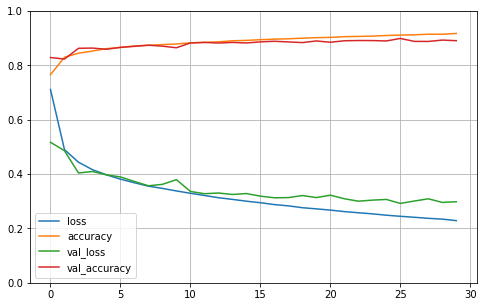

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

- 검증 손실은 에포크가 끝난 후에 계산되고 훈련 손실은 에포크가 진행되는 동안 계산됨 => 훈련 곡선은 에포크의 절반만큼 왼쪽으로 이동해야 됨
- 모델 성능이 만족스럽지 않으면 하이퍼파라미터를 튜닝.
    - 맨 처음 확인할 것은 학습률
    - 학습률이 도움이 되지 않으면 다른 옵티마이저를 테스트
    - 여전히 성능이 높지 않으면 모델의 하이퍼파라미터(층 개수, 층에 있는 뉴런 개수, 은닉층이 사용하는 활성화 함수)를 튜닝

In [27]:
# 일반화 오차 추정
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3268 - accuracy: 0.8843


[0.3268277049064636, 0.8842999935150146]

#### 모델을 사용해 예측을 만들기
- 모델의 `predict()` 메서드를 사용해 새로운 샘플에 대해 예측을 만들 수 있다.
- 각 샘플에 대해 클래스마다 각각의 확률을 모델이 추정
- `predict_class()` 메서드를 사용해 가장 높은 확률을 가진 클래스를 확인할 수 있음.

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [30]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [32]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### 10.2.3 시퀀셜 API를 사용하여 회구용 다층 퍼셉트론 만들기

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [36]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3360 - val_loss: 0.5899
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5819 - val_loss: 0.5204
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5051 - val_loss: 0.5053
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4798 - val_loss: 0.4811
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4594 - val_loss: 0.4693
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4441 - val_loss: 0.4553
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4309 - val_loss: 0.4356
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4206 - val_loss: 0.4247
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4096 - val_loss: 0.4196
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4054 - val_loss: 0.4254

### 10.2.4 함수형 API를 사용해 복잡한 모델 만들기
- 와이드 & 딥 신경망
    - 순차적이지 않은 신경망의 예
    - 입력의 일부 또는 전체가 출력층에 바로 연결됨
    - 이 구조를 사용하면 신경망이 (깊게 쌓은 층을 사용한) 복잡한 패턴과 (짧은 경로로 사용한) 간단한 규칙을 모두 학습할 수 있음.
![nn](그림10_14.png)

In [37]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [41]:
# 일부 특성은 짧은 경로로 전달하고 다른 특성들은 (중복 가능) 깊은 경로로 전달
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.6790 - val_loss: 1.1246
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.9083 - val_loss: 0.7992
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7502 - val_loss: 0.7285
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7021 - val_loss: 0.6940
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6730 - val_loss: 0.6687
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6515 - val_loss: 0.6485
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6336 - val_loss: 0.6323
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6182 - val_loss: 0.6167
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6050 - val_loss: 0.6058
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5930 - val_loss: 0.5929

![nn](그림10_15.png)

- 여러 출력이 필요한 경우:
    - 여러 출력이 필요한 작업. (e.g., 회구 작업과 분류 작업을 함께 하는 경우)
    - 동일한 데이터에서 독립적인 여러 작업을 수행 (e.g., 다중 작업 분류)
    - 규제 기법으로 사용하는 경우. (즉, 과대적합을 감소하고 모델의 일반화 성능을 높이도록 훈련에 제약을 가함)
    
![nn](그림10_16.png)

In [ ]:
# 출력층까지는 이전과 동일
output = keras.layers.Dense(1, name="main_out")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

# 각 출력은 자신만의 손실 함수 필요
# 보조 출력보다 주 출력에 더 관심이 많다면, 주 출력의 손시에 더 많은 가중치 부여
model.compile(loss=["mse", "mse"], loss_weigths=[0.9, 0.1], optimizer="sgd")

history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

# 모델을 평가하면 개별 손실과 총 손실을 함께 반환
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

# predict() 메서드는 각 출력에 대한 예측 반환
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

## 10.2.5 서브클래싱 API로 동적 모델 만들기


In [43]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

- 이 예제는 함수형 API와 매우 비슷하지만 Input 클래스의 객체를 만들 필요가 없다.
- 대신 `call()` 메서드의 `input` 매개변수를 사용.
- `call()` 메서드 안에서 원하는 어떤 계산도 사용할 수 있음.

### 10.2.6 모델 저장과 복원

In [ ]:
# 시퀀셜 API와 함수형 API를 사용하여 훈려된 케ㄹ스 모델 저장하기
model = keras.models.Sequential([...])
model.comile([...])
model.fit([...])
model.save("my_keras_model.h5")

- 케라스는 HDF5 포멧을 사용하여 (모든 층의 하이퍼파라미터를 포함하여) 모델 구조와 층의 모든 모델 파라미터(연결 가중치와 편향)를 저장.

In [ ]:
# 모델 로드
model = keras.models.load_model("my_keras_model.h5")

### 10.2.7 콜백 사용하기
- `fit()` 메서드의 `callbacks` 매개변수를 사용하여 케라스가 훈련의 시작이나 끝에 호출할 객체 리스트를 지정할 수 있음.
- `ModelCheckpoint`는 훈련하는 동안 일정한 간격으로 모델을 체크포인트를 저장.

In [ ]:
[...] # 모델을 만들고 컴파일하기
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callback=[checkpoint_cb])

- ModelCheckpoint를 만들 때 save_best_only=True로 지정하면 최상의 검증 세트 점수에서만 모델을 저장.

In [ ]:
# 조기 종료 구현 방법
checkpoint_cb = keras.callbacks.ModelCHeckpoint("my_keras_model.h5",
                                                save_best_only_Treu)
history = model.fity(X_train, y_train, epochs=10,
                     validation_data=(X_valid, y_valid),
                     callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")

- EarlyStopping 콜백 사용하여 조기 종료 구현 가능.
- 일정 에포크 동안 검증 세트에 대한 점수가 향상되지 않으면 훈련을 멈춤.

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  retore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

- 사용자 정의 콜백
    - 다음과 같은 사용자 정의 콜백은 훈련하는 동안 검증 손실과 훈련 손실의 비율을 출력 (과대적합 감지)

In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

### 10.2.8 텐서보드를 사용해 시각화하기
- 텐서보드 로그를 위해 사용할 루트 로그 디렉터리 정의.
- 현재 날짜와 시간을 사용해 실행할 때마다 다른 서브디렉터리 경로를 생성하는 간단한 함수

In [ ]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [ ]:
[...] # 모델 구성과 컴파일
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

- `TensorBoard()` 콜백이 로그 디렉터리를 생성하고, 훈련하는 동안 이벤트 파일을 만들고 서머리를 기록.

## 10.3 신경망 하이퍼파라미터 튜닝하기
- 주어진 문제에 최적인 하이퍼파라미터 조함 찾기
    - 많은 하이퍼파라미터 조합을 시도해보고 어떤 것이 검증 세트에서 가장 좋은 점수를 내는 지 확인 (`GridSearchCV`나 `RandomizedSearchCV` 사용)
    - 하이퍼파라미터가 많으므로 그리드 탐색보다 랜덤 탐색을 사용하는 것이 좋음.
- 효율적으로 하이퍼파라미터 공간을 탐색하는 기법:
    - Hyperopt: 모든 종류의 복잡한 탐색 공간에 대해 최적화를 수행할 수 있는 잘 알려진 라이브러리
    - Hyperas, kopt, Talos: 케라스 모델을 위한 하이퍼파라미터 최적화 라이브러리
    - 케러스 튜너: 사용하기 쉬운 케라스 하이퍼파라미터 최적화 라이브러리.
    - Scikit-Optimize(skopt): 범용 최적화 라이브러리
    - Spearmint: 베이즈 최적화 라이브러리
    - Hyperband: 빠른 하이퍼파라미터 튜닝 라이브러리
    - Sklearn-Deap: GridSearchCV와 비슷한 인터페이스를 가진 진화 알고리즘 기반의 하이퍼파라미터 최적화 라이브러리


### 10.3.1 은닉층 개수
- 복잡한 문제에서는 심층 신경망이 얕은 신경망보다 파라미터 효율성이 훨씬 좋다.
    - 심층 신경망은 복잡한 함수를 모델링하는데 얕은 신경망보다 훨씬 적은 수의 뉴런을 사용하므로 동일한 양의 훈련 데이터에서 더 높은 성능을 낼 수 있다.
- 전이 학습: 첫 번째 네트워크 하위 층을 재사용하여 훈련 시작 => 저수준 구조를 학습할 필요가 없음 => 고수준 구조만 학습

### 10.3.2 은닉층의 뉴런 개수
- 입력층과 출력층의 뉴런 개수는 해당 작업에 필요한 입력과 출력의 형태에 따라 결정.
- 대부분의 경우 모든 은닉층에 같은 뉴런 개수를 사용해도 동일하거나 더 나은 성능 보임.
- 필요한 것보다 더 많은 층과 뉴런을 가진 모델을 선택하고, 그런 다음 과대적합되지 않도록 조기 종료나 규제 기법을 사용하는 것이 간단하고 효과적.
- 한 층의 뉴런 수가 너무 적으면 입력에 있는 유용한 정보를 모두 유지하기 위한 충분한 표현 능력을 가지지 못함.

### 10.3.3 학습률, 배치 크기 그리고 다른 하이퍼파라미터
- 학습률:
    - 일반적으로 최적의 학습률은 최대 학습률의 절반 정도.
    - 좋은 학습률을 찾는 한 가지 방법은 매우 낮은 학습률에서 시작해서 점진적으로 매우 큰 학습률까지 수백 번 반복하여 모델을 훈련하는 것.
    - 최적의 학습률은 손실이 다시 상증하는 지점보다 조금 아래에 있음.
- 옵티마이저:
- 배치 크기:
    - 배치 크기는 모델 성능과 훈련 시간에 큰 영향을 미칠 수 있음.
    - 큰 배치 크기를 사용하는 것의 주용 장점을 GPU와 같은 하드웨어 가속기를 효율적으로 활용할 수 있다는 점 => 훈련 알고리즘이 초당 더 많은 샘플을 처리할 수 있음.
    - 많은 연구자들과 기술자들은 GPU 램에 맞는 가장 큰 배치 크기를 사용하길 권장.
    - 하지만 큰 배치를 사용한 결과 모델은 작은 배치 크기로 훈련된 모델만큼 일반화 성능을 내지 못할 수 있음.
- 활성화 함수:
     - 일반적으로 ReLU 활성화 함수가 모든 은닉층에 좋은 기본값.
     - 출력층의 활성화 함수는 수행하는 작업에 따라 달라짐.
- 반복 횟수:
    - 대부분의 경우 훈련 반복 횟수는 튜닝할 필요가 없음. 대신 조기 종료 사용.

